<h2>Tejas Pandit</h2>

<h2> <b>TASK 1 : Prediction using Supervised ML</b></h2>
Predict the percentage of marks based on the number of hours. This is a simple linear regression task as it involves just two variables.

### **The Sparks Foundation - Graduate Rotational Internship Program**

### Data Science & Business Analytics Intern

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb

In [2]:
df = pd.read_csv('http://bit.ly/w-data')
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [3]:
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


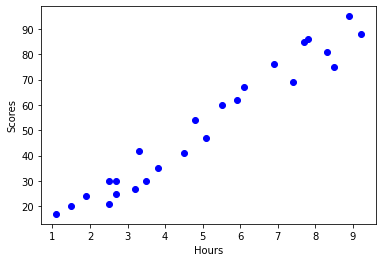

In [8]:
plt.scatter(df['Hours'], df['Scores'], color='blue')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [9]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print('No.of train samples: ', x_train.shape[0])
print('No.of test samples: ', x_test.shape[0])

No.of train samples:  20
No.of test samples:  5


In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr=LinearRegression()

In [14]:
lr.fit(x_train, y_train)

LinearRegression()

In [15]:
print('Coefficient: ',lr.coef_)
print('Intercept: ',lr.intercept_)

Coefficient:  [10.46110829]
Intercept:  -1.5369573315500702


In [16]:
lr.score(x_train,y_train)

0.9637848283990599

In [17]:
lr.score(x_test,y_test)

0.8421031525243527

In [18]:
yhat_train=lr.predict(x_train)
yhat_train

array([79.01357653, 62.27580326, 75.87524404, 35.0769217 , 31.93858921,
       26.70803506, 94.70523897, 55.99913828, 38.21525418, 51.81469497,
       24.6158134 , 24.6158134 , 91.56690648, 80.05968736, 70.64468989,
       26.70803506, 85.29024151, 45.53802999, 60.1835816 , 14.15470511])

In [19]:
yhat_test=lr.predict(x_test)
yhat_test

array([ 9.97026179, 32.98470004, 18.33914843, 87.38246316, 48.67636248])

Text(0, 0.5, 'Scores')

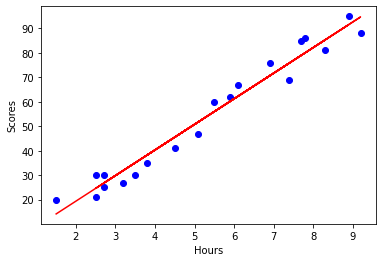

In [20]:
plt.scatter(x_train, y_train,  color='blue')
plt.plot(x_train, lr.coef_*x_train + lr.intercept_, '-r')
plt.xlabel("Hours")
plt.ylabel("Scores")

Text(0, 0.5, 'Scores')

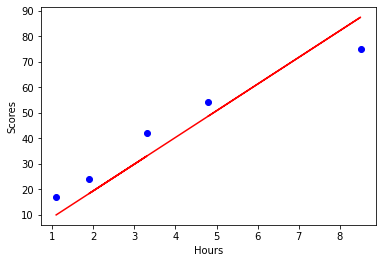

In [21]:
plt.scatter(x_test, y_test,  color='blue')
plt.plot(x_test, lr.coef_*x_test + lr.intercept_, '-r')
plt.xlabel("Hours")
plt.ylabel("Scores")

In [22]:
lr.score(x_test,y_test)

0.8421031525243527

In [23]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
predicted_score = lr.predict(test)
print ("No. of Hours = {}".format(hours))
print ("Predicted Score = {}".format(predicted_score[0]))

No. of Hours = 9.25
Predicted Score = 95.22829438402952


In [24]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(yhat_test - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((yhat_test - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test , yhat_test) )

Mean absolute error: 7.88
Residual sum of squares (MSE): 68.88
R2-score: 0.84
